# Scatter Plots

Scatter plots are a useful way of examining the relationship between two one-dimensional data series. matplotlib has a scatter plotting method that is the workhorse of making these kinds of plots. To give an example, I load the macrodata dataset from the statsmodels project, select a few variables, then compute log differences:

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [2]:
macro = pd.read_csv('../../../CSV Files/O_Reilly/ch08/macrodata.csv')

In [5]:
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 8 to 202
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      195 non-null    float64
 1   quarter   195 non-null    float64
 2   realgdp   195 non-null    float64
 3   realcons  195 non-null    float64
 4   realinv   195 non-null    float64
 5   realgovt  195 non-null    float64
 6   realdpi   195 non-null    float64
 7   cpi       195 non-null    float64
 8   m1        195 non-null    float64
 9   tbilrate  195 non-null    float64
 10  unemp     195 non-null    float64
 11  pop       195 non-null    float64
dtypes: float64(12)
memory usage: 18.4 KB


In [31]:
# data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

data = macro.iloc[:, 7:11]

data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [29]:
trans_data = np.log(data).diff().dropna()

In [30]:
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


It’s easy to plot a simple scatter plot using plt.scatter

Text(0.5, 1.0, 'Changes in log m1 vs log numep')

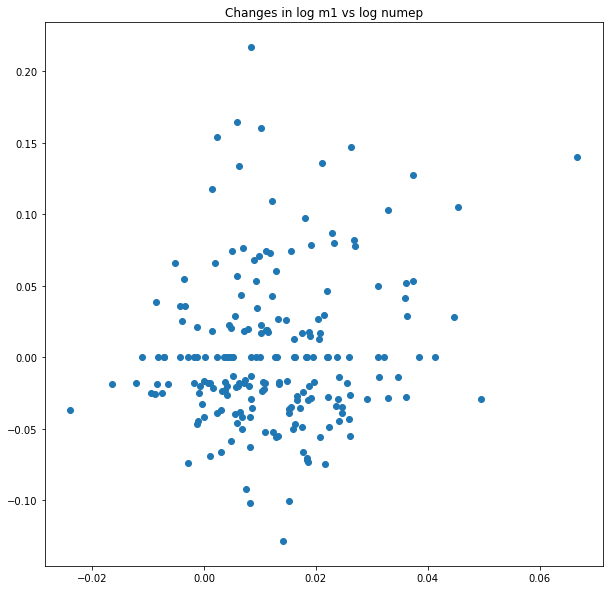

In [42]:
plt.figure(figsize = (10, 10))

plt.scatter(trans_data['m1'], trans_data['unemp'])

plt.title('Changes in log %s vs log %s' %('m1', 'numep'))

In exploratory data analysis it’s helpful to be able to look at all the scatter plots among a group of variables; this is known as a pairs plot or scatter plot matrix. Making such a plot from scratch is a bit of work, so pandas has a scatter_matrix function for creating one from a DataFrame. It also supports placing histograms or density plots of each variable along the diagonal.

array([[<AxesSubplot:xlabel='cpi', ylabel='cpi'>,
        <AxesSubplot:xlabel='m1', ylabel='cpi'>,
        <AxesSubplot:xlabel='tbilrate', ylabel='cpi'>,
        <AxesSubplot:xlabel='unemp', ylabel='cpi'>],
       [<AxesSubplot:xlabel='cpi', ylabel='m1'>,
        <AxesSubplot:xlabel='m1', ylabel='m1'>,
        <AxesSubplot:xlabel='tbilrate', ylabel='m1'>,
        <AxesSubplot:xlabel='unemp', ylabel='m1'>],
       [<AxesSubplot:xlabel='cpi', ylabel='tbilrate'>,
        <AxesSubplot:xlabel='m1', ylabel='tbilrate'>,
        <AxesSubplot:xlabel='tbilrate', ylabel='tbilrate'>,
        <AxesSubplot:xlabel='unemp', ylabel='tbilrate'>],
       [<AxesSubplot:xlabel='cpi', ylabel='unemp'>,
        <AxesSubplot:xlabel='m1', ylabel='unemp'>,
        <AxesSubplot:xlabel='tbilrate', ylabel='unemp'>,
        <AxesSubplot:xlabel='unemp', ylabel='unemp'>]], dtype=object)

<Figure size 864x864 with 0 Axes>

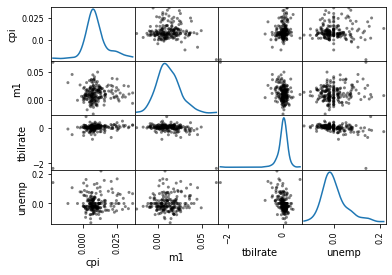

In [55]:
from pandas.plotting import scatter_matrix

plt.figure(figsize= (12, 12))

scatter_matrix(trans_data, diagonal = 'kde', color= 'black', alpha = .5)